TRABAJO PRACTICO 3 - REDES NEURONALES - LUCAS PINI

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

import src.preprocessing as pre
import src.models as models
import src.metrics as metrics

1. ANÁLISIS Y PREPROCESAMIENTO DE DATOS

1.1 Cargo los datasets y observo si coinciden los tamaños con los de la consigna

In [4]:
X_images = np . load ("data\X_images.npy")
y_images = np . load ("data\y_images.npy")

print(f"Forma de X_images: {X_images.shape}")
print(f"Forma de y_images: {y_images.shape}")
print(f"Número de clases: {len(np.unique(y_images))}")

Forma de X_images: (809555, 28, 28)
Forma de y_images: (809555,)
Número de clases: 47


1.2 Visualizacion de imagenes

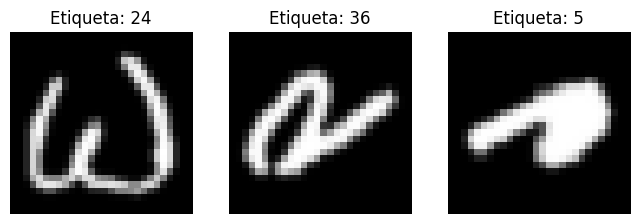

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for i, ax in enumerate(axes):
    img = X_images[i+9999].reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Etiqueta: {y_images[i]}")
    ax.axis("off")
plt.show()


1.3 Divido el dataset en Train, Validation y Test

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = pre.split_dataset(X_images, y_images)

print(f"Tamaño de Train: {X_train.shape[0]}")
print(f"Tamaño de Validation: {X_val.shape[0]}")
print(f"Tamaño de Test: {X_test.shape[0]}")

Tamaño de Train: 647644
Tamaño de Validation: 80955
Tamaño de Test: 80956


1.4 Normalización de los datos dividiendo por 255 y hago one-hot

In [5]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(f"Rango de X_train: {X_train.min():.3f} - {X_train.max():.3f}")

num_classes = len(np.unique(y_train))
X_train_flat = X_train.reshape(X_train.shape[0], -1).T
X_val_flat   = X_val.reshape(X_val.shape[0], -1).T

Y_train_oh = pre.one_hot(y_train, num_classes)
Y_val_oh   = pre.one_hot(y_val, num_classes)



Rango de X_train: 0.000 - 1.000


2. Entrenamiento de una Red Neuronal con:

- 2 capas ocultas

- 128 y 64 neuronas

- ReLU en ocultas y Softmax en salida

- Función de costo: Cross-Entropy

- Entrenamiento con gradiente descendente

- Inicialización de parametros con He inicialization como recomienda el Bishop y biases en 0

2.1 Defino y Entreno el modelo basico M0

In [ ]:
# Supongamos que ya tenés X_train, y_train, X_val, y_val normalizados y cargados
# (cada imagen en un vector de 784 = 28x28)


# === Definición del modelo M0 ===
dims = [784, 128, 64, num_classes]  # 2 capas ocultas

time_0 = time.time()
parametros_M0, losses_train, losses_val = models.entrenar_red_con_validacion(
    X_train_flat, Y_train_oh, X_val_flat, Y_val_oh,
    dims, epochs=20, lr=0.1 , batch_size=2000 # Uso de batching
)
time_1 = time.time()
print(f"Tiempo de entrenamiento M0: {time_1 - time_0:.2f} segundos")


Época 1/20 | Loss Train: 4.0217 | Loss Val: 4.0045
Época 2/20 | Loss Train: 4.0026 | Loss Val: 3.9867
Época 3/20 | Loss Train: 3.9850 | Loss Val: 3.9704
Época 4/20 | Loss Train: 3.9687 | Loss Val: 3.9551
Época 5/20 | Loss Train: 3.9535 | Loss Val: 3.9409
Época 6/20 | Loss Train: 3.9393 | Loss Val: 3.9275
Época 7/20 | Loss Train: 3.9260 | Loss Val: 3.9149
Época 8/20 | Loss Train: 3.9135 | Loss Val: 3.9029
Época 9/20 | Loss Train: 3.9016 | Loss Val: 3.8915
Época 10/20 | Loss Train: 3.8902 | Loss Val: 3.8806
Época 11/20 | Loss Train: 3.8795 | Loss Val: 3.8702
Época 12/20 | Loss Train: 3.8691 | Loss Val: 3.8602
Época 13/20 | Loss Train: 3.8592 | Loss Val: 3.8506
Época 14/20 | Loss Train: 3.8496 | Loss Val: 3.8413
Época 15/20 | Loss Train: 3.8404 | Loss Val: 3.8324
Época 16/20 | Loss Train: 3.8315 | Loss Val: 3.8237
Época 17/20 | Loss Train: 3.8229 | Loss Val: 3.8153
Época 18/20 | Loss Train: 3.8146 | Loss Val: 3.8072
Época 19/20 | Loss Train: 3.8064 | Loss Val: 3.7992
Época 20/20 | Loss Tr

Con el fin de evitar cargar matrices enormes en memoria se utilizo Batching en estos primeros modelos. Ya que por limitación de hardware se hacia imposible cargar el full batch. De esta forma proceso cada bloque por separado y acumulo los gradientes. Matematicamente obtengo el mismo resultado pero no sobrecargo la memoria RAM.

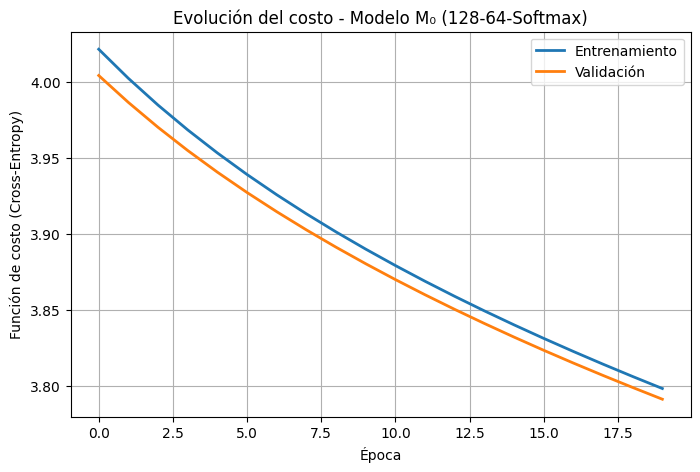

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(losses_train, label="Entrenamiento", linewidth=2)
plt.plot(losses_val, label="Validación", linewidth=2)
plt.xlabel("Época")
plt.ylabel("Función de costo (Cross-Entropy)")
plt.title("Evolución del costo - Modelo M₀ (128-64-Softmax)")
plt.legend()
plt.grid(True)
plt.show()


2.2 Reporte de Metricas

In [8]:
# === Predicciones ===
y_train_pred = models.predict(X_train_flat, parametros_M0)
y_val_pred   = models.predict(X_val_flat, parametros_M0)

# === Accuracy ===
acc_train = metrics.accuracy(y_train, y_train_pred)
acc_val   = metrics.accuracy(y_val, y_val_pred)

# === Cross-Entropy ===
Y_hat_train, _ = models.forward_propagation(X_train_flat, parametros_M0)
Y_hat_val, _   = models.forward_propagation(X_val_flat, parametros_M0)

loss_train = models.cross_entropy_loss(Y_train_oh, Y_hat_train)
loss_val   = models.cross_entropy_loss(Y_val_oh, Y_hat_val)

# === Matriz de confusión y F1 ===
num_classes = len(np.unique(y_train))
cm_train = metrics.confusion_matrix(y_train, y_train_pred, num_classes)
cm_val   = metrics.confusion_matrix(y_val, y_val_pred, num_classes)

f1_train = metrics.f1_score_macro(y_train, y_train_pred, num_classes)
f1_val   = metrics.f1_score_macro(y_val, y_val_pred, num_classes)

# === Mostrar resultados ===
print(f"Entrenamiento:")
print(f"  Accuracy:       {acc_train:.4f}")
print(f"  Cross-Entropy:  {loss_train:.4f}")
print(f"  F1-Score Macro: {f1_train:.4f}")
print("\nValidación:")
print(f"  Accuracy:       {acc_val:.4f}")
print(f"  Cross-Entropy:  {loss_val:.4f}")
print(f"  F1-Score Macro: {f1_val:.4f}")




Entrenamiento:
  Accuracy:       0.0401
  Cross-Entropy:  3.7908
  F1-Score Macro: 0.0163

Validación:
  Accuracy:       0.0393
  Cross-Entropy:  3.7915
  F1-Score Macro: 0.0164


HACER ANALISIS

3. Implementación y Entrenamiento de una Red Neuronal Avanzada

3.1 Rate scheduling lineal (con saturación) y exponencial

In [9]:
# Parámetros base del modelo M0
dims = [784, 128, 64, num_classes]

import time

t0 = time.time()
# --- Lineal con saturación ---
param_M1_lin, loss_tr_lin, loss_val_lin, lrs_lin = models.entrenar_red_con_validacion_scheduler(
    X_train_flat, Y_train_oh, X_val_flat, Y_val_oh,
    dims=dims,
    epochs=20,
    lr_init=0.01,
    lr_final=0.001,
    scheduler="linear"
)
t1 = time.time()


print(f"Tiempo de entrenamiento M1 (Linieal): {t1 - t0:.2f} segundos")

t2 = time.time()
# --- Exponencial ---
param_M1_exp, loss_tr_exp, loss_val_exp, lrs_exp = models.entrenar_red_con_validacion_scheduler(
    X_train_flat, Y_train_oh, X_val_flat, Y_val_oh,
    dims=dims,
    epochs=5,
    lr_init=0.01,
    decay_rate=0.05,
    scheduler="exponential"
)
t3 = time.time()

print(f"Tiempo de entrenamiento M1 (Exponencial): {t1 - t0:.2f} segundos")


Época 1/20 | Loss Train: 4.0217 | Loss Val: 4.0045
Época 2/20 | Loss Train: 4.0026 | Loss Val: 3.9875
Época 3/20 | Loss Train: 3.9858 | Loss Val: 3.9725
Época 4/20 | Loss Train: 3.9708 | Loss Val: 3.9592
Época 5/20 | Loss Train: 3.9576 | Loss Val: 3.9473
Época 6/20 | Loss Train: 3.9457 | Loss Val: 3.9365
Época 7/20 | Loss Train: 3.9350 | Loss Val: 3.9269
Época 8/20 | Loss Train: 3.9254 | Loss Val: 3.9183
Época 9/20 | Loss Train: 3.9168 | Loss Val: 3.9104
Época 10/20 | Loss Train: 3.9090 | Loss Val: 3.9034
Época 11/20 | Loss Train: 3.9021 | Loss Val: 3.8971
Época 12/20 | Loss Train: 3.8958 | Loss Val: 3.8914
Época 13/20 | Loss Train: 3.8902 | Loss Val: 3.8864
Época 14/20 | Loss Train: 3.8851 | Loss Val: 3.8819
Época 15/20 | Loss Train: 3.8807 | Loss Val: 3.8780
Época 16/20 | Loss Train: 3.8769 | Loss Val: 3.8746
Época 17/20 | Loss Train: 3.8735 | Loss Val: 3.8717
Época 18/20 | Loss Train: 3.8706 | Loss Val: 3.8694
Época 19/20 | Loss Train: 3.8683 | Loss Val: 3.8674
Época 20/20 | Loss Tr

Visualización de resultados:

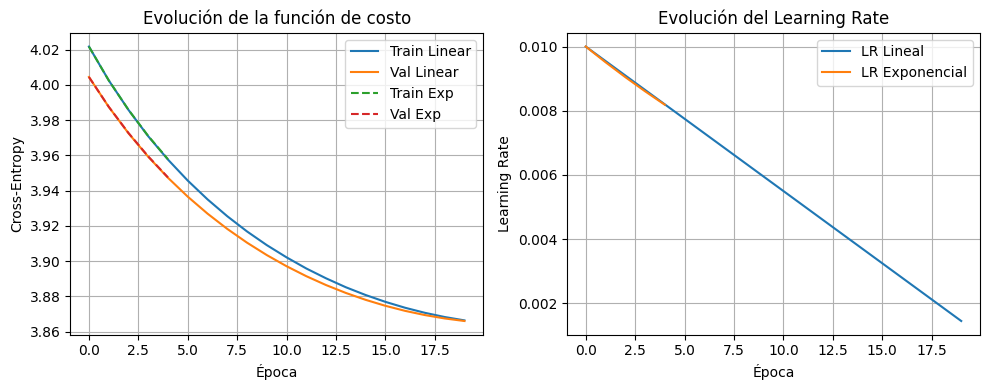

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(loss_tr_lin, label="Train Linear")
plt.plot(loss_val_lin, label="Val Linear")
plt.plot(loss_tr_exp, label="Train Exp", linestyle='--')
plt.plot(loss_val_exp, label="Val Exp", linestyle='--')
plt.xlabel("Época")
plt.ylabel("Cross-Entropy")
plt.title("Evolución de la función de costo")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(lrs_lin, label="LR Lineal")
plt.plot(lrs_exp, label="LR Exponencial")
plt.xlabel("Época")
plt.ylabel("Learning Rate")
plt.title("Evolución del Learning Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


3.2 Mini-batch stochastic gradient descent

In [11]:
dims = [784, 128, 64, num_classes]

param_Mopt, loss_tr_sgd, loss_val_sgd = models.entrenar_red_minibatch_optimizado(
    X_train_flat, Y_train_oh,
    X_val_flat, Y_val_oh,
    dims=dims,
    epochs=20,
    lr=0.2,
    batch_size=512,   # probá 256–1024 según tu RAM
    verbose=True,
    val_interval=1
)



Época 1/20 | Loss Train: 0.8630 | Loss Val: 0.5638
Época 2/20 | Loss Train: 0.5245 | Loss Val: 0.4665
Época 3/20 | Loss Train: 0.4594 | Loss Val: 0.4292
Época 4/20 | Loss Train: 0.4268 | Loss Val: 0.4155
Época 5/20 | Loss Train: 0.4055 | Loss Val: 0.3974
Época 6/20 | Loss Train: 0.3912 | Loss Val: 0.3901
Época 7/20 | Loss Train: 0.3802 | Loss Val: 0.3752
Época 8/20 | Loss Train: 0.3717 | Loss Val: 0.3744
Época 9/20 | Loss Train: 0.3639 | Loss Val: 0.3741
Época 10/20 | Loss Train: 0.3577 | Loss Val: 0.3661
Época 11/20 | Loss Train: 0.3522 | Loss Val: 0.3648
Época 12/20 | Loss Train: 0.3474 | Loss Val: 0.3589
Época 13/20 | Loss Train: 0.3436 | Loss Val: 0.3595
Época 14/20 | Loss Train: 0.3397 | Loss Val: 0.3527
Época 15/20 | Loss Train: 0.3361 | Loss Val: 0.3514
Época 16/20 | Loss Train: 0.3329 | Loss Val: 0.3523
Época 17/20 | Loss Train: 0.3302 | Loss Val: 0.3587
Época 18/20 | Loss Train: 0.3277 | Loss Val: 0.3458
Época 19/20 | Loss Train: 0.3252 | Loss Val: 0.3400
Época 20/20 | Loss Tr

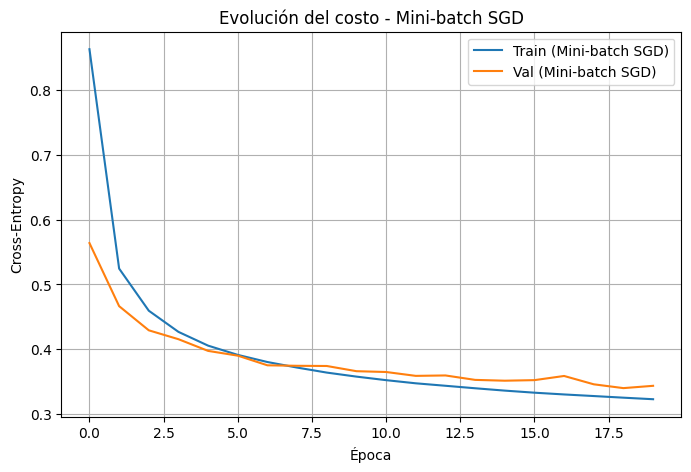

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(loss_tr_sgd, label="Train (Mini-batch SGD)")
plt.plot(loss_val_sgd, label="Val (Mini-batch SGD)")
plt.xlabel("Época")
plt.ylabel("Cross-Entropy")
plt.title("Evolución del costo - Mini-batch SGD")
plt.legend()
plt.grid(True)
plt.show()


Reporte de metricas:

In [13]:
# === Predicciones ===
y_train_pred = models.predict(X_train_flat, param_Mopt)
y_val_pred   = models.predict(X_val_flat, param_Mopt)

# === Accuracy ===
acc_train = metrics.accuracy(y_train, y_train_pred)
acc_val   = metrics.accuracy(y_val, y_val_pred)

# === Cross-Entropy ===
Y_hat_train, _ = models.forward_propagation(X_train_flat, param_Mopt)
Y_hat_val, _   = models.forward_propagation(X_val_flat, param_Mopt)

loss_train = models.cross_entropy_loss(Y_train_oh, Y_hat_train)
loss_val   = models.cross_entropy_loss(Y_val_oh, Y_hat_val)

# === Matriz de confusión y F1 ===
num_classes = len(np.unique(y_train))
cm_train = metrics.confusion_matrix(y_train, y_train_pred, num_classes)
cm_val   = metrics.confusion_matrix(y_val, y_val_pred, num_classes)

f1_train = metrics.f1_score_macro(y_train, y_train_pred, num_classes)
f1_val   = metrics.f1_score_macro(y_val, y_val_pred, num_classes)

# === Mostrar resultados ===
print(f"Entrenamiento:")
print(f"  Accuracy:       {acc_train:.4f}")
print(f"  Cross-Entropy:  {loss_train:.4f}")
print(f"  F1-Score Macro: {f1_train:.4f}")
print("\nValidación:")
print(f"  Accuracy:       {acc_val:.4f}")
print(f"  Cross-Entropy:  {loss_val:.4f}")
print(f"  F1-Score Macro: {f1_val:.4f}")



Entrenamiento:
  Accuracy:       0.8879
  Cross-Entropy:  0.3152
  F1-Score Macro: 0.8616

Validación:
  Accuracy:       0.8801
  Cross-Entropy:  0.3435
  F1-Score Macro: 0.8457


3.3 Optimizador Adam.

In [14]:
dims = [784, 128, 64, num_classes]

param_adam, loss_tr_adam, loss_val_adam = models.entrenar_red_adam(
    X_train_flat, Y_train_oh,
    X_val_flat, Y_val_oh,
    dims=dims,
    epochs=20,
    lr=0.001,         # Adam usa lr más bajo
    batch_size=512,   # más grande = más estable
    verbose=True,
    val_interval=1
)


Época 1/20 | Loss Train: 0.8120 | Loss Val: 0.5976
Época 2/20 | Loss Train: 0.5665 | Loss Val: 0.5257
Época 3/20 | Loss Train: 0.5158 | Loss Val: 0.4925
Época 4/20 | Loss Train: 0.4876 | Loss Val: 0.4736
Época 5/20 | Loss Train: 0.4679 | Loss Val: 0.4555
Época 6/20 | Loss Train: 0.4530 | Loss Val: 0.4439
Época 7/20 | Loss Train: 0.4411 | Loss Val: 0.4353
Época 8/20 | Loss Train: 0.4315 | Loss Val: 0.4278
Época 9/20 | Loss Train: 0.4233 | Loss Val: 0.4205
Época 10/20 | Loss Train: 0.4161 | Loss Val: 0.4169
Época 11/20 | Loss Train: 0.4099 | Loss Val: 0.4110
Época 12/20 | Loss Train: 0.4041 | Loss Val: 0.4057
Época 13/20 | Loss Train: 0.3991 | Loss Val: 0.4014
Época 14/20 | Loss Train: 0.3944 | Loss Val: 0.3978
Época 15/20 | Loss Train: 0.3903 | Loss Val: 0.3961
Época 16/20 | Loss Train: 0.3863 | Loss Val: 0.3939
Época 17/20 | Loss Train: 0.3825 | Loss Val: 0.3897
Época 18/20 | Loss Train: 0.3794 | Loss Val: 0.3877
Época 19/20 | Loss Train: 0.3760 | Loss Val: 0.3852
Época 20/20 | Loss Tr

Reporte de metricas:

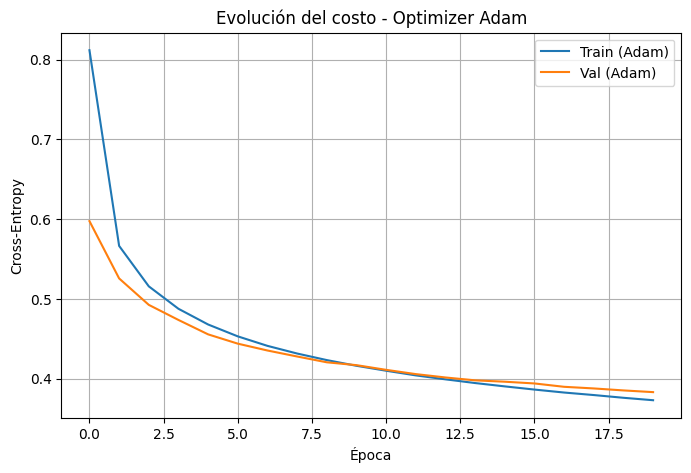

In [15]:
plt.figure(figsize=(8,5))
plt.plot(loss_tr_adam, label="Train (Adam)")
plt.plot(loss_val_adam, label="Val (Adam)")
plt.xlabel("Época")
plt.ylabel("Cross-Entropy")
plt.title("Evolución del costo - Optimizer Adam")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
def metrics_report(X_train, Y_train_oh, y_train,
                   X_val, Y_val_oh, y_val,
                   parametros, num_classes):
    """
    Evalúa un modelo entrenado y muestra métricas de performance.
    Calcula Accuracy, Cross-Entropy, Matriz de Confusión y F1-Score Macro
    tanto para entrenamiento como validación.

    Parámetros
    ----------
    X_train, X_val : np.ndarray
        Entradas (flattened) para train y validation (shape: [n_features, n_samples])
    Y_train_oh, Y_val_oh : np.ndarray
        Etiquetas one-hot codificadas
    y_train, y_val : np.ndarray
        Etiquetas en formato entero
    parametros : dict
        Pesos del modelo entrenado
    num_classes : int
        Número total de clases
    """
    # === Predicciones ===
    y_train_pred = models.predict(X_train, parametros)
    y_val_pred   = models.predict(X_val, parametros)

    # === Accuracy ===
    acc_train = metrics.accuracy(y_train, y_train_pred)
    acc_val   = metrics.accuracy(y_val, y_val_pred)

    # === Cross-Entropy ===
    Y_hat_train, _ = models.forward_propagation(X_train, parametros)
    Y_hat_val, _   = models.forward_propagation(X_val, parametros)
    loss_train = models.cross_entropy_loss(Y_train_oh, Y_hat_train)
    loss_val   = models.cross_entropy_loss(Y_val_oh, Y_hat_val)

    # === Matriz de confusión y F1 ===
    cm_train = metrics.confusion_matrix(y_train, y_train_pred, num_classes)
    cm_val   = metrics.confusion_matrix(y_val, y_val_pred, num_classes)

    f1_train = metrics.f1_score_macro(y_train, y_train_pred, num_classes)
    f1_val   = metrics.f1_score_macro(y_val, y_val_pred, num_classes)

    # === Mostrar resultados ===
    print("Entrenamiento:")
    print(f"  Accuracy:       {acc_train:.4f}")
    print(f"  Cross-Entropy:  {loss_train:.4f}")
    print(f"  F1-Score Macro: {f1_train:.4f}")
    print("\nValidación:")
    print(f"  Accuracy:       {acc_val:.4f}")
    print(f"  Cross-Entropy:  {loss_val:.4f}")
    print(f"  F1-Score Macro: {f1_val:.4f}")

    return {
        "acc_train": acc_train, "acc_val": acc_val,
        "loss_train": loss_train, "loss_val": loss_val,
        "f1_train": f1_train, "f1_val": f1_val,
        "cm_train": cm_train, "cm_val": cm_val
    }


In [18]:
metrics_report(
    X_train_flat, Y_train_oh, y_train,
    X_val_flat, Y_val_oh, y_val,
    param_adam, num_classes
)

Entrenamiento:
  Accuracy:       0.8747
  Cross-Entropy:  0.3680
  F1-Score Macro: 0.8380

Validación:
  Accuracy:       0.8699
  Cross-Entropy:  0.3830
  F1-Score Macro: 0.8278


{'acc_train': 0.8747382821426586,
 'acc_val': 0.869903032548947,
 'loss_train': 0.36802847753867673,
 'loss_val': 0.38304928635340285,
 'f1_train': 0.8380274808927629,
 'f1_val': 0.8278246623869016,
 'cm_train': array([[26370,     3,     7, ...,     1,     0,     3],
        [    0, 32307,    27, ...,     1,    28,    46],
        [   12,    14, 30685, ...,    17,     4,    11],
        ...,
        [   14,    10,    22, ...,   706,     2,     9],
        [    3,    17,     6, ...,     0, 12282,    65],
        [    1,    71,     8, ...,     1,    55, 15655]]),
 'cm_val': array([[3285,    2,    4, ...,    0,    0,    0],
        [   0, 4032,    0, ...,    0,    4,    4],
        [   2,    0, 3835, ...,    5,    3,    3],
        ...,
        [   1,    0,    3, ...,   85,    0,    0],
        [   0,    4,    0, ...,    0, 1522,    8],
        [   0,   15,    2, ...,    0,   15, 1920]])}

3.4 Regularización (L2, Early Stopping)

In [19]:
dims = [784, 128, 64, num_classes]

param_reg, loss_tr_reg, loss_val_reg = models.entrenar_red_adam_regularizado(
    X_train_flat, Y_train_oh,
    X_val_flat, Y_val_oh,
    dims=dims,
    epochs=50,
    lr=0.001,
    batch_size=512,
    lambda_l2=1e-4,
    patience=5,
    val_interval=2,
    verbose=True
)


Época 1/50 | Train: 0.8120 | Val: 0.5976
Época 2/50 | Train: 0.5663 | Val: 0.5248
Época 4/50 | Train: 0.4864 | Val: 0.4724
Época 6/50 | Train: 0.4524 | Val: 0.4428
Época 8/50 | Train: 0.4312 | Val: 0.4270
Época 10/50 | Train: 0.4159 | Val: 0.4161
Época 12/50 | Train: 0.4038 | Val: 0.4044
Época 14/50 | Train: 0.3940 | Val: 0.3966
Época 16/50 | Train: 0.3857 | Val: 0.3918
Época 18/50 | Train: 0.3787 | Val: 0.3858
Época 20/50 | Train: 0.3723 | Val: 0.3804
Época 22/50 | Train: 0.3668 | Val: 0.3763
Época 24/50 | Train: 0.3616 | Val: 0.3730
Época 26/50 | Train: 0.3572 | Val: 0.3709
Época 28/50 | Train: 0.3530 | Val: 0.3683
Época 30/50 | Train: 0.3488 | Val: 0.3668
Época 32/50 | Train: 0.3454 | Val: 0.3635
Época 34/50 | Train: 0.3418 | Val: 0.3611
Época 36/50 | Train: 0.3389 | Val: 0.3586
Época 38/50 | Train: 0.3359 | Val: 0.3577
Época 40/50 | Train: 0.3332 | Val: 0.3551
Época 42/50 | Train: 0.3305 | Val: 0.3538
Época 44/50 | Train: 0.3280 | Val: 0.3537
Época 46/50 | Train: 0.3258 | Val: 0.35

Reporte de metricas:

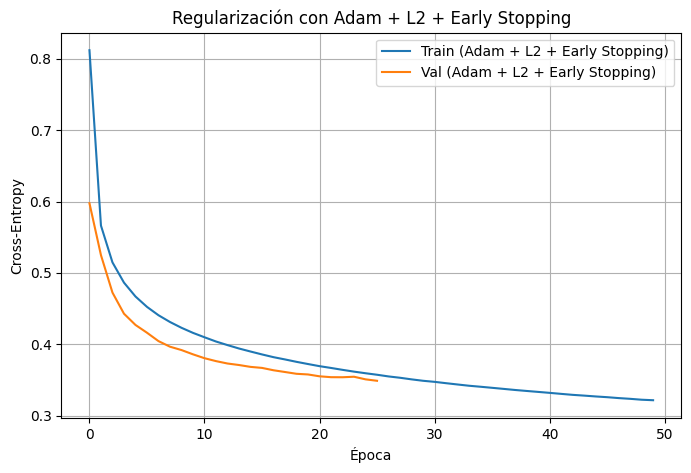

In [20]:
plt.figure(figsize=(8,5))
plt.plot(loss_tr_reg, label="Train (Adam + L2 + Early Stopping)")
plt.plot(loss_val_reg, label="Val (Adam + L2 + Early Stopping)")
plt.xlabel("Época")
plt.ylabel("Cross-Entropy")
plt.title("Regularización con Adam + L2 + Early Stopping")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
metrics_report(
    X_train_flat, Y_train_oh, y_train,
    X_val_flat, Y_val_oh, y_val,
    param_reg, num_classes
)

Entrenamiento:
  Accuracy:       0.8890
  Cross-Entropy:  0.3154
  F1-Score Macro: 0.8604

Validación:
  Accuracy:       0.8794
  Cross-Entropy:  0.3488
  F1-Score Macro: 0.8419


{'acc_train': 0.8890316284872554,
 'acc_val': 0.8794391946142919,
 'loss_train': 0.3153823443346644,
 'loss_val': 0.3487772364907576,
 'f1_train': 0.860384514503498,
 'f1_val': 0.841919464689334,
 'cm_train': array([[26888,     3,     8, ...,     2,     2,     2],
        [    2, 32481,    25, ...,     2,    21,    17],
        [    6,     6, 30842, ...,    10,    11,     4],
        ...,
        [   12,     3,    16, ...,   841,     4,     5],
        [    2,    13,     2, ...,     0, 12514,    18],
        [    4,    51,     8, ...,     3,    69, 15747]]),
 'cm_val': array([[3349,    1,    3, ...,    0,    0,    0],
        [   0, 4032,    0, ...,    0,    4,    2],
        [   1,    0, 3846, ...,    2,    2,    2],
        ...,
        [   0,    0,    2, ...,   97,    0,    0],
        [   0,    3,    0, ...,    0, 1554,    3],
        [   1,    7,    1, ...,    0,   14, 1919]])}

3.5 Exploracion de Arquitecturas y Combinaciones de Distintos Modelos 

In [23]:
import numpy as np
import pandas as pd
import time

# === SUBSET PARA BÚSQUEDA RÁPIDA ===
subset = 100_000
X_train_sub = X_train_flat[:, :subset]
Y_train_sub = Y_train_oh[:, :subset]
y_train_sub = y_train[:subset]
X_val_sub = X_val_flat[:, :subset//5]
Y_val_sub = Y_val_oh[:, :subset//5]
y_val_sub = y_val[:subset//5]

# === HIPERPARÁMETROS A EXPLORAR ===
architectures = [
    [128, 64],
    [256, 128],
    [256, 128, 64]
]

learning_rates = [0.001, 0.002]
lambdas = [1e-5, 1e-4]
batch_sizes = [256, 512]

# === RESULTADOS ===
results = []
model_id = 1

# === LOOP DE EXPERIMENTOS ===
for arch in architectures:
    for lr in learning_rates:
        for lam in lambdas:
            for bs in batch_sizes:
                print(f"\n🧠 Entrenando Modelo {model_id}: {arch}, lr={lr}, λ={lam}, batch={bs}")
                dims = [784] + arch + [len(np.unique(y_train))]
                start_time = time.time()

                try:
                    parametros, loss_train, loss_val = models.entrenar_red_adam_regularizado(
                        X_train_sub, Y_train_sub,
                        X_val_sub, Y_val_sub,
                        dims=dims,
                        epochs=10,
                        lr=lr,
                        batch_size=bs,
                        lambda_l2=lam,
                        patience=3,
                        val_interval=2,
                        verbose=False
                    )

                    # Evaluación en subset
                    eval_res = metrics_report(
                        X_train_sub, Y_train_sub, y_train_sub,
                        X_val_sub, Y_val_sub, y_val_sub,
                        parametros,
                        num_classes=len(np.unique(y_train))
                    )

                    # Guardar resultados
                    elapsed = time.time() - start_time
                    results.append({
                        "Modelo": model_id,
                        "Capas ocultas": arch,
                        "Learning rate": lr,
                        "Lambda L2": lam,
                        "Batch size": bs,
                        "Train Loss": eval_res["loss_train"],
                        "Val Loss": eval_res["loss_val"],
                        "Train Acc": eval_res["acc_train"],
                        "Val Acc": eval_res["acc_val"],
                        "Tiempo (s)": round(elapsed, 2)
                    })
                    model_id += 1

                except Exception as e:
                    print(f"❌ Error en modelo {model_id}: {e}")
                    results.append({
                        "Modelo": model_id,
                        "Capas ocultas": arch,
                        "Learning rate": lr,
                        "Lambda L2": lam,
                        "Batch size": bs,
                        "Error": str(e)
                    })
                    model_id += 1
                    continue

# === EXPORTAR RESULTADOS ===
df_results = pd.DataFrame(results)
df_results.sort_values(by="Val Loss", inplace=True)
df_results.to_csv("hyperparam_search_results.csv", index=False)

print("\n✅ Búsqueda completada. Resultados guardados en 'hyperparam_search_results.csv'")
display(df_results.head(10))



🧠 Entrenando Modelo 1: [128, 64], lr=0.001, λ=1e-05, batch=256

✅ Entrenamiento completado en 360.54 s.
Entrenamiento:
  Accuracy:       0.8326
  Cross-Entropy:  0.5348
  F1-Score Macro: 0.7736

Validación:
  Accuracy:       0.8207
  Cross-Entropy:  0.5757
  F1-Score Macro: 0.7541

🧠 Entrenando Modelo 2: [128, 64], lr=0.001, λ=1e-05, batch=512


KeyboardInterrupt: 

4. Desarrollo de una Red Neuronal con PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Convertir arrays de NumPy a tensores
X_train_torch = torch.tensor(X_train_flat.T, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_val_torch   = torch.tensor(X_val_flat.T, dtype=torch.float32)
y_val_torch   = torch.tensor(y_val, dtype=torch.long)

# Crear datasets y loaders
batch_size = 512  # mismo que el mejor de M1
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset   = TensorDataset(X_val_torch, y_val_torch)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
class MLP_M2(nn.Module):
    def __init__(self, dims):
        super(MLP_M2, self).__init__()
        layers = []
        for i in range(len(dims) - 2):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-2], dims[-1]))  # capa de salida
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)


In [ ]:
dims = [784, 256, 128, 64, 47]  # usa los mismos valores que M1
model = MLP_M2(dims)
